In [0]:
from keras.datasets import mnist

from keras.utils import to_categorical
from keras import models, layers

import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
(x_tr, y_tr),(x_te,y_te) = mnist.load_data()

In [19]:
x_tr.shape

(60000, 28, 28)

In [0]:
#Preprocess

In [0]:
x_tr = x_tr.astype('float32')/255.
x_te = x_te.astype('float32')/255.
x_tr = x_tr.reshape((x_tr.shape[0],x_tr.shape[1]*x_tr.shape[2]))
x_te = x_te.reshape((x_te.shape[0],x_te.shape[1]*x_te.shape[2]))

In [0]:
y_tr = to_categorical(y_tr)
y_te = to_categorical(y_te)

In [0]:
# Split training data

In [0]:
x_val = x_tr[:10000]
y_val = y_tr[:10000]

x_tr = x_tr[10000:]
y_tr = y_tr[10000:]



In [39]:
x_val.shape

(10000, 784)

In [40]:
x_tr.shape

(50000, 784)

# 10000 validation and 50000 for training


# x_tr into x_tr and x_val


# y_tr into y_tr and y_val

In [0]:
# Model

In [0]:
#A function to create the model
def build_complex_model():
    model = models.Sequential()
    
    model.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))
    model.add(layers.Dense(1024, activation='relu'))
    model.add(layers.Dense(1024, activation='relu'))
    model.add(layers.Dense(1024, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))
    
    model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])
    
    return model

In [0]:
complex_model = build_complex_model() #Create the model

In [43]:
complex_model.summary() #Lets see how many parameters do we have.

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_17 (Dense)             (None, 1024)              525312    
_________________________________________________________________
dense_18 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
dense_19 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
dense_20 (Dense)             (None, 10)                10250     
Total params: 3,036,682
Trainable params: 3,036,682
Non-trainable params: 0
_________________________________________________________________


In [44]:
complex_hist = complex_model.fit(x_tr, y_tr, epochs=10, batch_size=128, validation_data=(x_val,y_val)) #train the model

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 4s 89us/step - loss: 0.3043 - acc: 0.9104 - val_loss: 0.1496 - val_acc: 0.9596
Epoch 2/10
50000/50000 [==============================] - 4s 80us/step - loss: 0.1226 - acc: 0.9660 - val_loss: 0.1564 - val_acc: 0.9682
Epoch 3/10
50000/50000 [==============================] - 4s 80us/step - loss: 0.0932 - acc: 0.9759 - val_loss: 0.1242 - val_acc: 0.9692
Epoch 4/10
50000/50000 [==============================] - 4s 80us/step - loss: 0.0801 - acc: 0.9800 - val_loss: 0.1115 - val_acc: 0.9750
Epoch 5/10
50000/50000 [==============================] - 4s 80us/step - loss: 0.0704 - acc: 0.9831 - val_loss: 0.1164 - val_acc: 0.9745
Epoch 6/10
50000/50000 [==============================] - 4s 81us/step - loss: 0.0642 - acc: 0.9846 - val_loss: 0.1153 - val_acc: 0.9754
Epoch 7/10
50000/50000 [==============================] - 4s 80us/step - loss: 0.0563 - acc: 0.9870 - val_loss: 0.1587 - val_acc

In [0]:
complex_hist = complex_hist.history

In [0]:
def print_acc(hist):
  epochs = range(1, len(hist['acc'])+1)
  plt.plot(epochs, hist['acc'], 'b', label='Training acc')
  plt.plot(epochs, hist['val_acc'], 'r', label='Validation acc')
  plt.title('Training and validation Acc')
  plt.xlabel('Epochs')
  plt.ylabel('Acc')
  plt.legend()
  plt.show()

In [0]:
def print_loss(hist):
  epochs = range(1, len(hist['loss'])+1)
  plt.plot(epochs, hist['loss'], 'b', label='Training loss')
  plt.plot(epochs, hist['val_loss'], 'r', label='Validation loss')
  plt.title('Training and validation Loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()

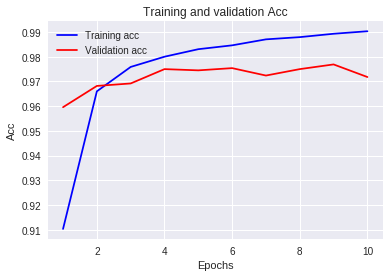

In [48]:
print_acc(complex_hist)

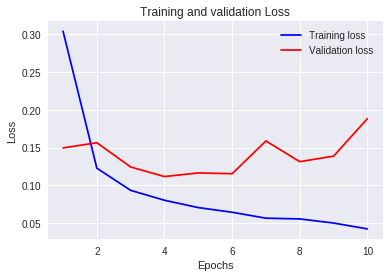

In [49]:
print_loss(complex_hist)

In [0]:
perfect_model = build_complex_model() #Create the model

In [52]:
complex_hist = perfect_model.fit(x_tr, y_tr, epochs=6, batch_size=128, validation_data=(x_val,y_val)) #train the model

Train on 50000 samples, validate on 10000 samples
Epoch 1/6
50000/50000 [==============================] - 5s 92us/step - loss: 0.2988 - acc: 0.9086 - val_loss: 0.3437 - val_acc: 0.9148
Epoch 2/6
50000/50000 [==============================] - 4s 83us/step - loss: 0.1205 - acc: 0.9669 - val_loss: 0.1088 - val_acc: 0.9712
Epoch 3/6
50000/50000 [==============================] - 4s 82us/step - loss: 0.0943 - acc: 0.9756 - val_loss: 0.1644 - val_acc: 0.9672
Epoch 4/6
50000/50000 [==============================] - 4s 81us/step - loss: 0.0789 - acc: 0.9797 - val_loss: 0.1323 - val_acc: 0.9743
Epoch 5/6
50000/50000 [==============================] - 4s 80us/step - loss: 0.0723 - acc: 0.9831 - val_loss: 0.1275 - val_acc: 0.9758
Epoch 6/6
50000/50000 [==============================] - 4s 80us/step - loss: 0.0604 - acc: 0.9854 - val_loss: 0.1387 - val_acc: 0.9734


In [53]:
perfect_model.evaluate(x_te, y_te)

10000/10000 [==============================] - 1s 80us/step


[0.1332361420395578, 0.9766]

## **TO DO - Split validation an training.**
## **TO DO - Let's reduce the number of layers and analyze the behaviour.**
